In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install haversine
import haversine as hs

In [3]:
df = pd.read_csv(r"C:\Users\Melvin Wong\DataScience\Springboard\Github\Capstone-Three\Capstone_3\Data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Identifying the columns and the types

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Identifying the count, mean, STD, and min


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Columns with null values

In [7]:
#identifying the null values for each column 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Function to count attrition and attrition % with fields

In [8]:
# Define a function to calculate attrition statistics
def calculate_attrition(df, group_by_column):
    return df.groupby(group_by_column).agg(
        TotalEmployees=('Attrition', 'size'),
        AttritionCount=('Attrition', lambda x: (x == 'Yes').sum()),
        NonAttritionCount=('Attrition', lambda x: (x == 'No').sum()),
        AttritionPercentage=('Attrition', lambda x: round((x == 'Yes').sum() / x.size * 100, 2)),
        NonAttritionPercentage=('Attrition', lambda x: round((x == 'No').sum() / x.size * 100, 2))
    ).reset_index()


# List of relevant columns to analyze
relevant_columns = [col for col in df.columns if col != 'Attrition' and col not in ['EmployeeNumber', 'EmployeeCount']]

# Dictionary to store results for each column
attrition_analysis = {}

# Calculate attrition for each relevant column
for column in relevant_columns:
    attrition_analysis[column] = calculate_attrition(df, column)


# Attrition count and attirtion % for selected fields

In [9]:
# Display the result for 'OverTime'
attrition_analysis['OverTime']

,OverTime,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,No,1054,110,944,10.44,89.56
1,Yes,416,127,289,30.53,69.47


In [10]:
# Display the result for 'Number of Companies worked for'
attrition_analysis['NumCompaniesWorked']

,NumCompaniesWorked,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,197,23,174,11.68,88.32
1,1,521,98,423,18.81,81.19
2,2,146,16,130,10.96,89.04
3,3,159,16,143,10.06,89.94
4,4,139,17,122,12.23,87.77
5,5,63,16,47,25.40,74.60
6,6,70,16,54,22.86,77.14
7,7,74,17,57,22.97,77.03
8,8,49,6,43,12.24,87.76
9,9,52,12,40,23.08,76.92


In [11]:
# Display the result for 'EnvironmentSatisfaction'
attrition_analysis['EnvironmentSatisfaction']

,EnvironmentSatisfaction,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,284,72,212,25.35,74.65
1,2,287,43,244,14.98,85.02
2,3,453,62,391,13.69,86.31
3,4,446,60,386,13.45,86.55


In [12]:
# Display the result for 'PercentSalaryHike'
attrition_analysis['PercentSalaryHike']

,PercentSalaryHike,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,11,210,41,169,19.52,80.48
1,12,198,33,165,16.67,83.33
2,13,209,34,175,16.27,83.73
3,14,201,24,177,11.94,88.06
4,15,101,18,83,17.82,82.18
5,16,78,14,64,17.95,82.05
6,17,82,14,68,17.07,82.93
7,18,89,13,76,14.61,85.39
8,19,76,9,67,11.84,88.16
9,20,55,7,48,12.73,87.27


In [13]:
# Display the result for 'StockOptionLevel'
attrition_analysis['StockOptionLevel']

,StockOptionLevel,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,631,154,477,24.41,75.59
1,1,596,56,540,9.40,90.60
2,2,158,12,146,7.59,92.41
3,3,85,15,70,17.65,82.35


In [14]:
# Display the result for 'YearsWithCurrManager'
attrition_analysis['YearsWithCurrManager']

,YearsWithCurrManager,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,263,85,178,32.32,67.68
1,1,76,11,65,14.47,85.53
2,2,344,50,294,14.53,85.47
3,3,142,19,123,13.38,86.62
4,4,98,11,87,11.22,88.78
5,5,31,4,27,12.90,87.10
6,6,29,4,25,13.79,86.21
7,7,216,31,185,14.35,85.65
8,8,107,10,97,9.35,90.65
9,9,64,6,58,9.38,90.62


In [15]:
# Display the result for 'YearsSinceLastPromotion'
attrition_analysis['YearsSinceLastPromotion']

,YearsSinceLastPromotion,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,581,110,471,18.93,81.07
1,1,357,49,308,13.73,86.27
2,2,159,27,132,16.98,83.02
3,3,52,9,43,17.31,82.69
4,4,61,5,56,8.20,91.80
5,5,45,2,43,4.44,95.56
6,6,32,6,26,18.75,81.25
7,7,76,16,60,21.05,78.95
8,8,18,0,18,0.00,100.00
9,9,17,4,13,23.53,76.47


In [16]:
# Display the result for 'BusinessTravel'
attrition_analysis['BusinessTravel']

,BusinessTravel,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,Non-Travel,150,12,138,8.00,92.00
1,Travel_Frequently,277,69,208,24.91,75.09
2,Travel_Rarely,1043,156,887,14.96,85.04


In [17]:
# Display the result for 'JobInvolvement'
attrition_analysis['JobInvolvement']

,JobInvolvement,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,83,28,55,33.73,66.27
1,2,375,71,304,18.93,81.07
2,3,868,125,743,14.40,85.60
3,4,144,13,131,9.03,90.97


In [18]:
# Display the result for 'Education'
attrition_analysis['Education']

,Education,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,170,31,139,18.24,81.76
1,2,282,44,238,15.60,84.40
2,3,572,99,473,17.31,82.69
3,4,398,58,340,14.57,85.43
4,5,48,5,43,10.42,89.58


In [19]:
# Display the result for 'Department'
attrition_analysis['Department']

,Department,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,Human Resources,63,12,51,19.05,80.95
1,Research & Development,961,133,828,13.84,86.16
2,Sales,446,92,354,20.63,79.37


# Exploratory Data Analysis


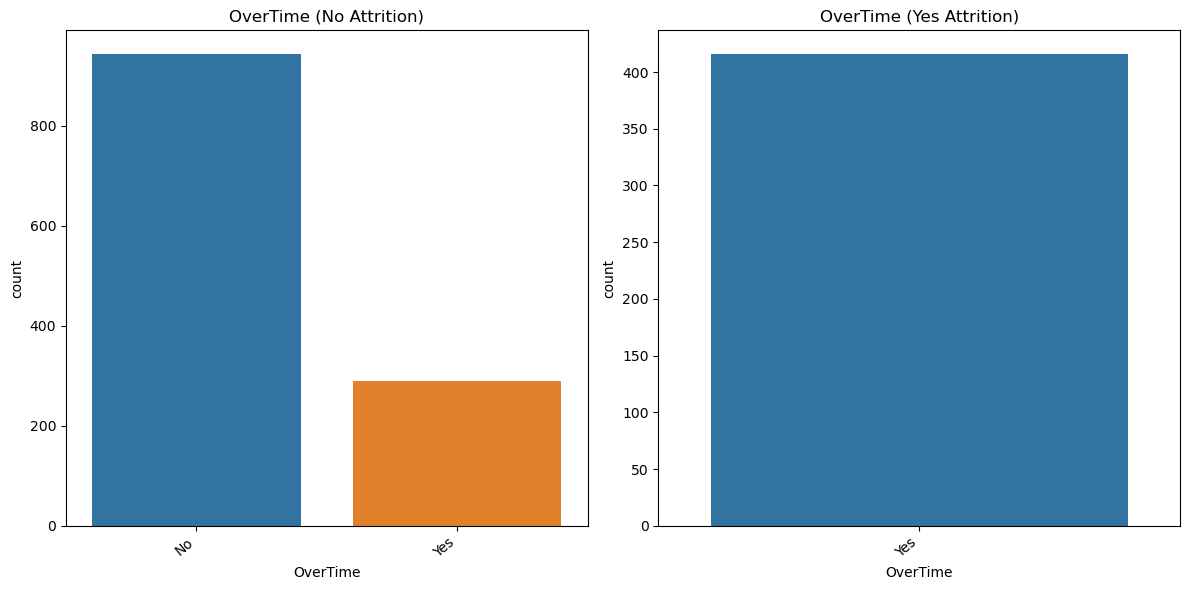

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df
ax1 = sns.countplot(data=attrition_no_df, x='OverTime', ax=axes[0])
plt.setp(ax1.get_xticklabels(), rotation=40, ha="right")  # Use plt.setp() for rotation and alignment
ax1.set_title('OverTime (No Attrition)')

# Plot for attrition_yes_df
ax2 = sns.countplot(data=attrition_yes_df, x='OverTime', ax=axes[1])
plt.setp(ax2.get_xticklabels(), rotation=40, ha="right")  # Use plt.setp() for rotation and alignment
ax2.set_title('OverTime (Yes Attrition)')

plt.tight_layout()
plt.show()

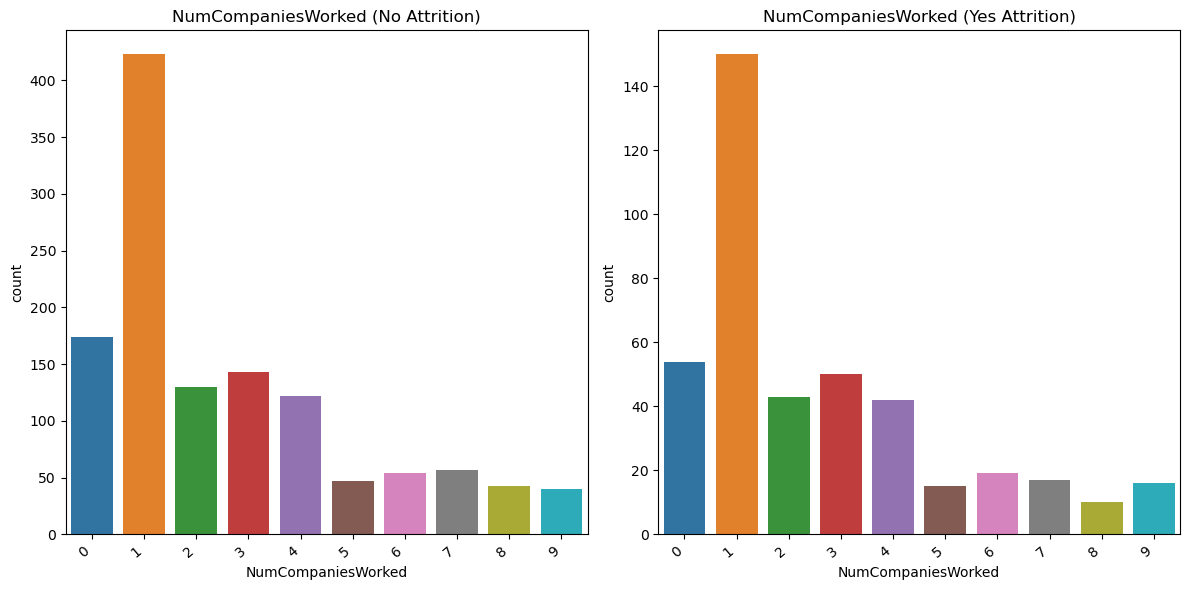

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for NumCompaniesWorked
ax1 = sns.countplot(data=attrition_no_df, x='NumCompaniesWorked', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('NumCompaniesWorked (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for NumCompaniesWorked
ax2 = sns.countplot(data=attrition_yes_df, x='NumCompaniesWorked', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('NumCompaniesWorked (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


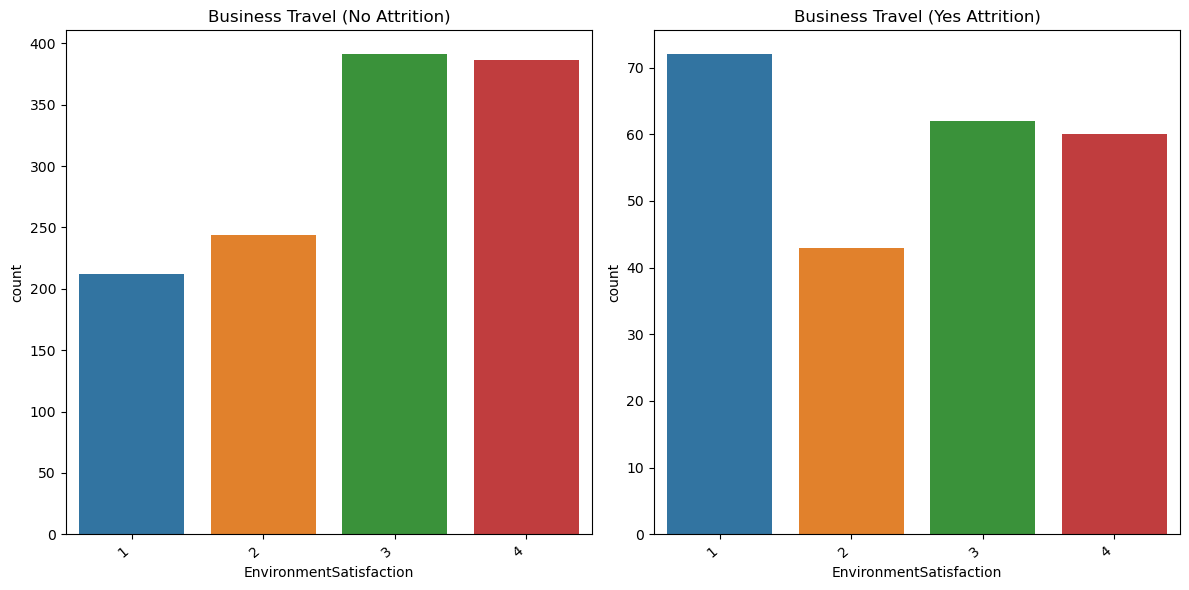

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for EnvironmentSatisfaction
ax1 = sns.countplot(data=attrition_no_df, x='EnvironmentSatisfaction', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('Business Travel (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for EnvironmentSatisfaction
ax2 = sns.countplot(data=attrition_yes_df, x='EnvironmentSatisfaction', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('Business Travel (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


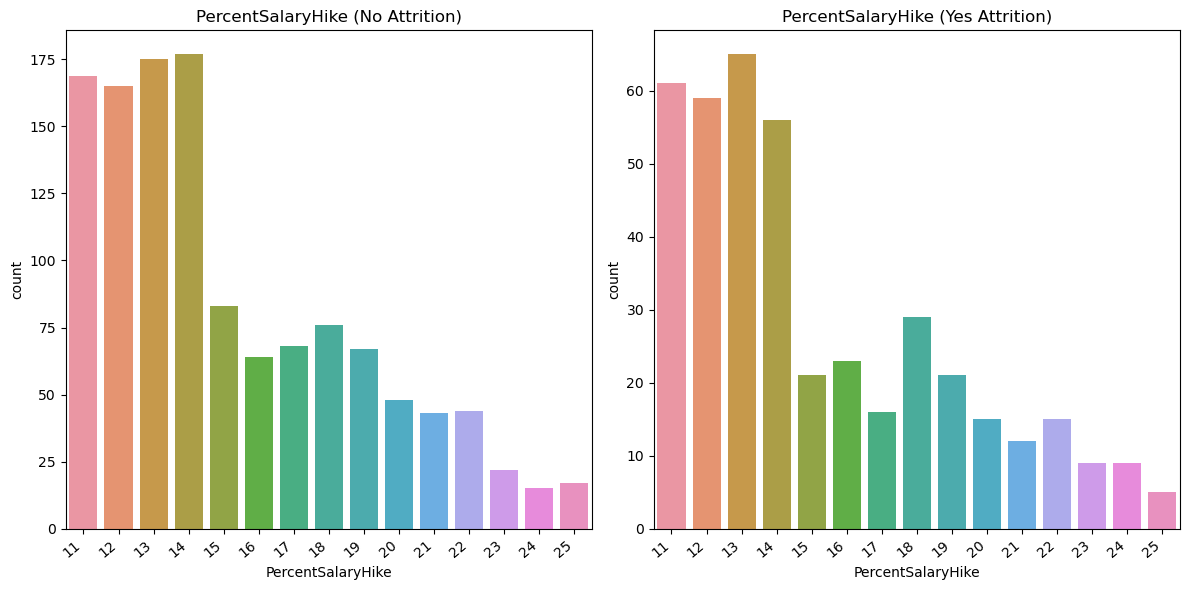

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for JobInvolvement 
ax1 = sns.countplot(data=attrition_no_df, x='PercentSalaryHike', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('PercentSalaryHike (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for JobInvolvement 
ax2 = sns.countplot(data=attrition_yes_df, x='PercentSalaryHike', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('PercentSalaryHike (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


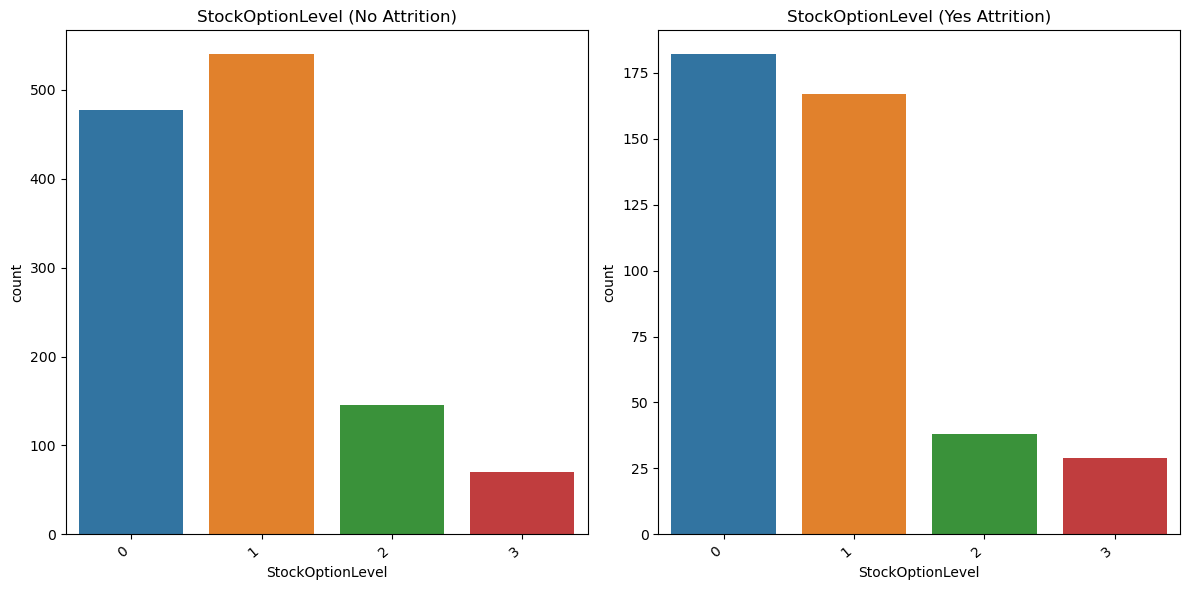

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for StockOptionLevel 
ax1 = sns.countplot(data=attrition_no_df, x='StockOptionLevel', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('StockOptionLevel (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for JobInvolvement 
ax2 = sns.countplot(data=attrition_yes_df, x='StockOptionLevel', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('StockOptionLevel (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


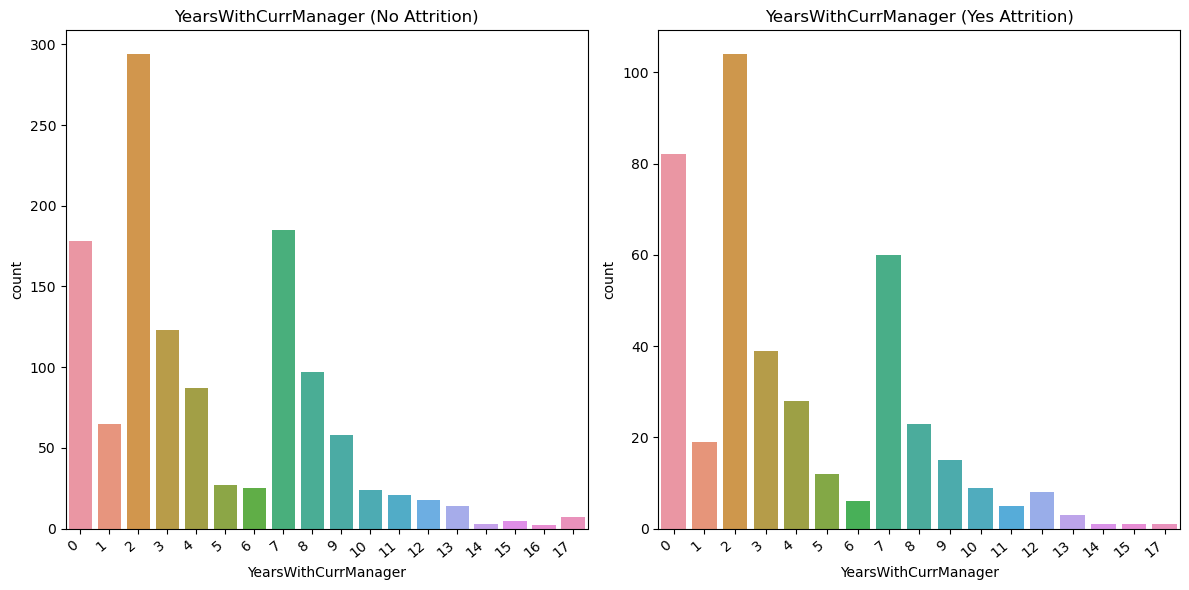

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for YearsWithCurrManager 
ax1 = sns.countplot(data=attrition_no_df, x='YearsWithCurrManager', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('YearsWithCurrManager (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for YearsWithCurrManager 
ax2 = sns.countplot(data=attrition_yes_df, x='YearsWithCurrManager', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('YearsWithCurrManager (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for YearsWithCurrManager 
ax1 = sns.countplot(data=attrition_no_df, x='YearsWithCurrManager', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('YearsWithCurrManager (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for YearsWithCurrManager 
ax2 = sns.countplot(data=attrition_yes_df, x='YearsWithCurrManager', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('YearsWithCurrManager (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for YearsWithCurrManager 
ax1 = sns.countplot(data=attrition_no_df, x='YearsWithCurrManager', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('YearsWithCurrManager (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for YearsWithCurrManager 
ax2 = sns.countplot(data=attrition_yes_df, x='YearsWithCurrManager', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('YearsWithCurrManager (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


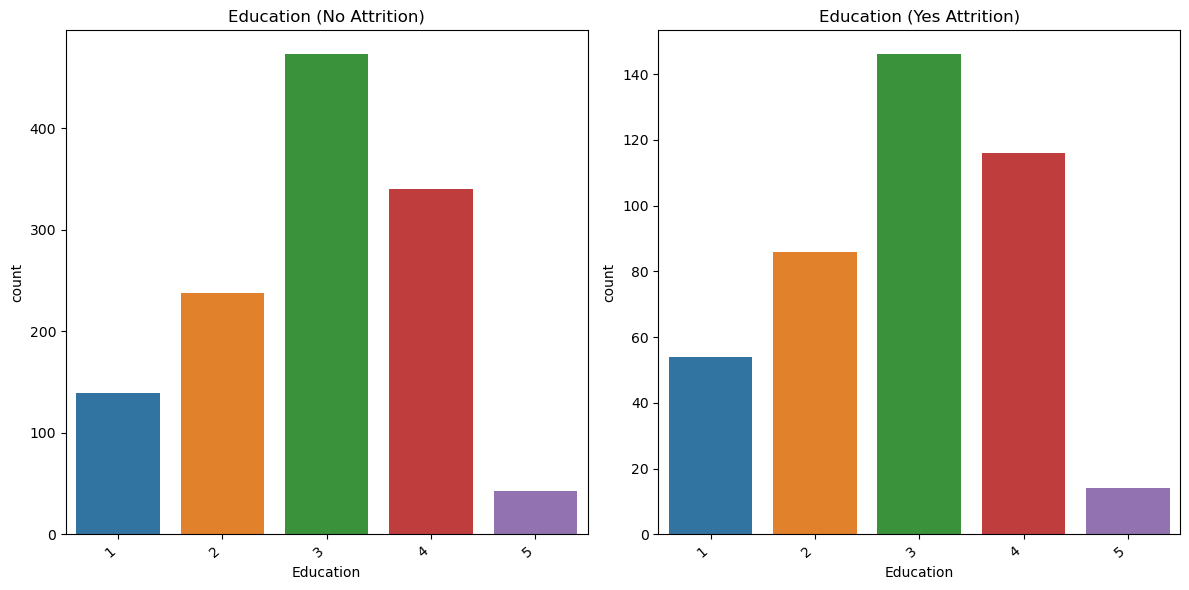

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for JobInvolvement 
ax1 = sns.countplot(data=attrition_no_df, x='Education', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('Education (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for JobInvolvement 
ax2 = sns.countplot(data=attrition_yes_df, x='Education', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('Education (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


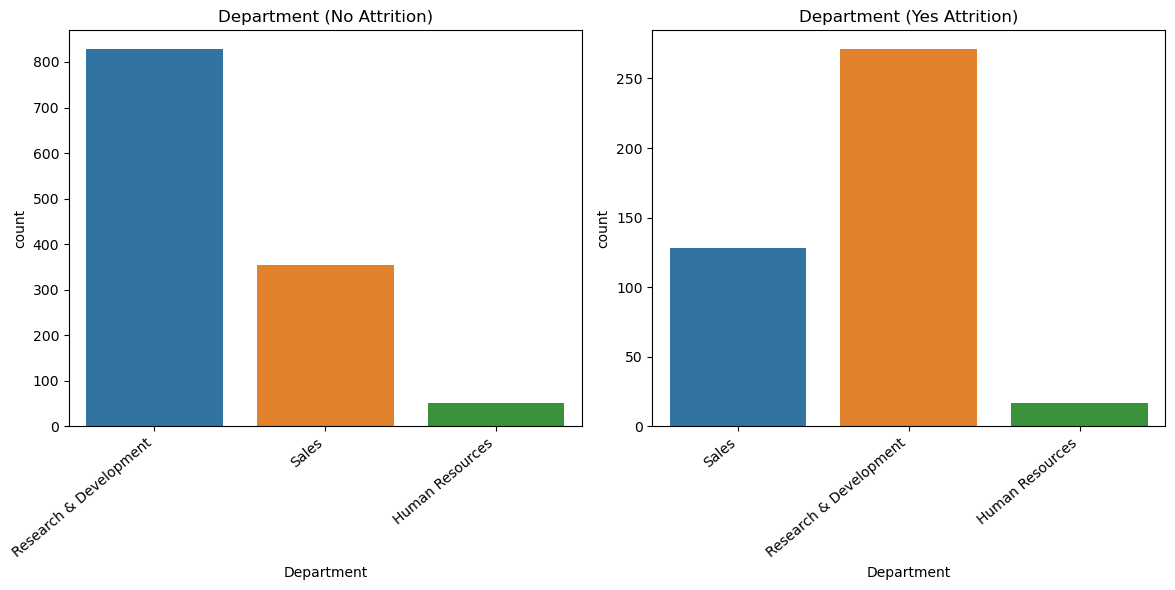

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create subplots with a specified figure size

# Plot for attrition_no_df for Department 
ax1 = sns.countplot(data=attrition_no_df, x='Department', ax=axes[0])  # Specify the first subplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set_title('Department (No Attrition)')  # Optional: add a title

# Plot for attrition_yes_df for Department 
ax2 = sns.countplot(data=attrition_yes_df, x='Department', ax=axes[1])  # Specify the second subplot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set_title('Department (Yes Attrition)')  # Optional: add a title

plt.tight_layout()  # Adjust layout to prevent overlapping of elements
plt.show()


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Attrition'), 
                                                    df.Attrition, test_size=0.3, 
                                                    random_state=47)